### Frequency Analysis for a Vigenere Cypher

Assumes that we know:
1. Cipher Text
2. Key Length (determined by Kasiski or Index of Conincidence methods)

The goal of the algorithm is the perform frequency analysis on the cipher text to determine the possible letter offsets used to encode each letter of the plain text.  The algorithm will return a list of possible letter values for each letter of the key.

This freqency list can be used to do a simplified brute force analysis on possible key combination values. 

In [1]:
PT_1 = """\
The end when it finally came was just as chaotic messy and jaw dropping \ 
as every other chapter \ 
of Boris Johnsons political career Holed up in Downing Street on \
Wednesday night the prime minister faced an open rebellion of his cabinet\ 
a catastrophic loss of support in his Conservative Party and a wholesale \
exodus of ministers which threatened to leave significant parts of \
the British government without functioning leadership \
Yet far from surrendering Mr Johnsons aides put out word that \ 
he would continue to fight It looked like a last roll of \
the dice by one of the great gamblers in British politics \ 
His brazen refusal to bow to reality invited comparisons to\ 
Donald J Trumps defiance in the chaotic days after he lost the twenty twenty presidential election \
\
By Thursday morning however political gravity had finally reasserted itself \
For one of the few times in his career Mr Johnson was unable to bend the narrative \
to his advantage through the sheer force of his personality \
At midday the prime minister went to a lectern in front of \
ten Downing Street to announce he was relinquishing the leadership \
of a party that no longer supported him and giving up a job he had \
pursued for much of his adult life I want to tell you how sorry I am\ 
to be giving up the best job in the world Mr Johnson said Then \
defusing the solemnity of the moment with a wry line from the pool \
halls of America he added Thems the breaks\
George Washington is often described as childless which is true 
but only in the strictly biological definition. 
When I started digging into his archives, I was surprised 
to see that in reality, he was raising children from his late 
20s until the day he died. When Washington met Martha Custis, 
she was a wealthy widow with a young daughter and son, and when they married, 
he became the legal guardian to Patsy and Jacky Custis. 
Washington’s letters and ledgers indicate that he spent 
significant time and money (though he often reimbursed 
himself from the Custis estate) making sure the children 
were happy, healthy and well educated. His youth had been 
defined by relative struggle and deprivation, and he wanted 
them to have the very best of everything.
\
In the end however Mr Johnsons risk taking bravado was \
not enough to compensate for his shortcomings He engaged in \
behavior that critics said revealed a sense of entitlement and a \
belief that the rules did not apply to him his staff or his \
loyalists Critics accused him of being disorganized \
ideologically and administratively\
\
After leading Britain out of the European Union in 2020 \
the prime minister did not have much of a plan for what \
to do next He quickly became hostage to events lurching \
from crisis to crisis as the coronavirus pandemic engulfed Britain \
A pattern of scandals which followed him throughout his career soon overtook Downing Street\
\
In the end however Mr Johnsons risk taking bravado was not enough \
to compensate for his shortcomings He engaged in behavior that critics \
said revealed a sense of entitlement and a belief that the rules did not \
apply to him his staff or his loyalists \
Critics accused him of being disorganized ideologically and administratively"""

PT_2 = """Saudi Arabias de facto ruler, Crown Prince Mohammed bin Salman, \
hit back at Joe Biden after the US President confronted him about the 2018 \
murder of Saudi journalist Jamal Khashoggi during a meeting between the two leaders on Friday.\
In the meeting, Bin Salman, also known as MBS, denied responsibility for the \
killing of Khashoggi at the kingdom's Istanbul consulate. Biden said US \
intelligence contradicted the prince's claims.\
MBS countered with the sexual and physical abuse of prisoners at Iraq's \
Abu Ghraib prison by US military personnel and the killing of Palestinian \
American journalist Shireen Abu Akleh in the occupied West Bank -- incidents, \
he said, that reflected poorly on the US. Prince Faisal bin Farhan, the \
Saudi foreign minister, detailed parts of the conversation in a press conference on Saturday.
"The Crown Prince responded to President Biden's remarks on ... Khashoggi \after quite clearly -- that this crime, while very unfortunate and abhorrent, is something that the kingdom took very seriously (and) acted upon in a way commiserate with its position as a responsible country," bin Farhan said. "These are issues, mistakes that happen in any country, including the US. The Crown Prince pointed out that the US has made its own mistakes and has taken the necessary action to hold those responsible accountable and address these mistakes just as the kingdom has."
Saudi Minister of State for Foreign Affairs Adel al-Jubeir echoed the sentiment in an interview with CNN's Wolf Blitzer shortly after the end of the meeting, which Jubeir was part of.
"We investigated, punished and ensure that this doesn't happen again," Jubeir said when asked about the Khashoggi murder. "This is what countries do. This is what the US did when the mistake of Abu Ghraib was committed."
The Abu Ghraib prison was a US Army detention center for captured Iraqis from the start of the US invasion of Iraq in 2003 until the prison's closure in 2006. In 2004, a trove of graphic images from the prison was leaked, depicting the torture and sexual abuse of Iraqi prisoners by US military personnel. Eleven US soldiers were convicted of crimes relating to the scandal.
Renowned Al Jazeera journalist Abu Akleh was lethally gunned down during an Israeli military raid in the occupied West Bank city of Jenin.
Abu Akleh was a household name in the Arab world, having spent decades reporting on the suffering of Palestinians under Israeli occupation. Footage obtained by CNN -- corroborated by testimony from eight eyewitnesses, an audio forensic analyst and an explosive weapons expert -- suggested that Abu Akleh, who was wearing a helmet and blue protective vest marked "Press" at the time of her killing, was shot dead in a targeted attack by Israeli forces.
In the West Bank on Friday, Biden said the US insists on a "full and transparent accounting" of the killing of the journalist.
Biden called Abu Akleh's death an "enormous loss" as he stood alongside Palestinian Authority President Mahmoud Abbas in Bethlehem.
"I hope that her legacy ... will inspire more young people to carry on her work of reporting the truth and telling stories that are too often overlooked. The United States will continue to insist on a full and transparent accounting of her death and will continue to stand up for media freedom everywhere in the world," Biden said.
Palestinian officials and members of Abu Akleh's family have criticized the US probe and are urging the US to do more to hold Israel accountable for the killing.
Khashoggi raised at the top of Biden-MBS meeting
In a quickly arranged speech after Biden's bilateral talks with MBS, the President said he raised Khashoggi's murder at the start of the meeting.
"With respect to the murder of Khashoggi, I raised it at the top of the meeting, making it clear what I thought of it at the time and what I think of it now," Biden told reporters. "I was straightforward and direct in discussing it. I made my view crystal clear."
There was also a larger discussion about values, bin Farhan said.
"The Crown Prince pointed out to President Biden that we the kingdom, the respect for human rights is a core value for the Kingdom of Saudi Arabia based on our Islamic beliefs and our Arab heritage. And that it's absolutely important that values be spread through dialogue," he said. "Trying to impose your values on others is not going to be effective. It will get you a negative reaction. ... The right way to try and put your values forward is to show the world that you adhere first of all to those values, that you are respecting your own values."
"In the endm you cannot impose your values by force. ... The Crown Prince was quite clear with President Biden, and we have our own values and those are not going to align 100% with US values ever because we are very, very proud of our own traditions, our own values, our own faith," bin Farhan added.
But the discussion about human rights appears to have been dwarfed by broader talks about energy security, regional stability, trade and investment, according to multiple officials. Iran's nuclear ambitions and the war in Yemen are also believed to have been key parts of the discussions.
"Those responsible (for Khashoggi's murder) have been investigated and faced the law and are paying the price for their crime," Jubeir said on CNN of the discussion. "The conversation moved on in terms of the official discussion."
Senior administration officials on Saturday defended Biden's decision to meet with MBS face-to-face, despite the fierce pushback and criticism, saying it would have been "backsliding if the president didn't come to the region and it would be backsliding if he didn't and wasn't willing to sit and raise human rights concerns with foreign leaders around the world."
"It's difficult to say that values are gonna be a key part of your foreign policy and human rights matters significantly to us as a nation and certainly as an administration and then not go overseas and not talk to (leaders) in candid, forthright ways about that concerns," a senior administration official said.
Biden came to Jeddah seeking solutions to one of his top political problems at home -- sky-high gas prices -- as diplomacy with Saudi Arabia in the Middle East was seen as one of the few routes he could take to bring down prices that are putting strain on millions of Americans.
But White House officials say the President won't be returning to Washington on Saturday with explicit oil production increases. The expectation is that there will be increases in the months ahead -- done within the context of increased output levels in the OPEC+ cartel laid out at its August meeting."""

#88 Bytes long (approximately)
raw_pt2_251 = """

Saudi Arabia's de facto ruler, Crown Prince Mohammed bin Salman, hit back at Joe Biden after the US President 

"""

raw_pt2_25 = """

Saudi Arabia's de facto ruler, Crown Prince Mohammed bin Salman, hit back at Joe Biden after the US President confronted him about the 2018 murder of Saudi journalist Jamal Khashoggi during a meeting between the two leaders on Friday, according to a source familiar with the matter.

"""

CT_TEST = "The end when it finally came was just as chaotic messy and jaw dropping as every other chapter of Boris Johnsons political career Holed up in Downing Street on Wednesday night the prime minister faced an open rebellion of his cabinet"
CT_1 = "MEUHWODIIRTLOHKFV JZBR CSUX"
ALPHABET = "ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890"
ALPHABET_NO_NUM = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
ALPHABET_NO_NUM_SPACE = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

#This is the % Alphabet distribution in the english language; 
#Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html
FREQ_CNT = [0.084966, 0.020720, 0.045388,  
           0.033844, 0.111607, 0.018121,  
           0.024705, 0.030034, 0.075809,  
           0.001965, 0.011016, 0.054893,  
           0.030129, 0.066544, 0.071635,  
           0.031671, 0.001962, 0.075809,  
           0.057351, 0.069509, 0.036308,  
           0.010074, 0.012899, 0.002902,  
           0.017779, 0.002722
          ]

EXPECTED = dict(zip(ALPHABET_NO_NUM_SPACE,FREQ_CNT))

x_axis_list = list()
y_axis_ave_key_size_list = list()
y_axis_ave_pass_rate_list = list()
y_axis_ave_fail_rate_list = list()
Verbose = False

print(len(PT_1+PT_2))

9851


In [2]:
global Verbose

# helpher function to return a python dictionary of the cipher alphabet indexed by the position 
# of each letter in the alphabet
# currently not used
def get_alpha_dict(alphabet):
    alphaDict = {}
    for i, letter in enumerate(alphabet):
        alphaDict[letter]=i
    return alphaDict

# encryption function for vigenere cipher.
# encrypts each letter with a different cipher alphabet which has been shifted based on the letter in the key, 
# A -> shift by 0; z -> shift by 25.
# Key is repeated to match the size of the plain text.
def encrypt_vignere(message, key, alphabet):
    message = message.upper()
    kLen = len(key)
    ciphertext = ""
    kIndex = 0
    
    for letter in message:
        #skip letters not in the alphabet
        if letter not in alphabet:
            continue
            
        #encrypt each letter with corresponding letter from vigenere key
        kLetter = key[kIndex]
        shiftValue = (alphabet.find(letter)+alphabet.find(kLetter)) % len(alphabet)
        ciphertext += alphabet[shiftValue]
        kIndex = (kIndex + 1) % kLen

    if Verbose:
        print(f"Message : {message[:15]}...")
        print(f"Ciphertext : {ciphertext[:15]}...")
    return ciphertext

# decryption function for vigenere cipher.
# decrypts each litter with a different cipher alphabet which has been shifted based on the letter in the key, 
# A -> shift by 0; z -> shift by 25.
# Key is repeated to match the size of the ciphertext.
def decrypt_vignere(message, key, alphabet):
    kLen = len(key)
    plaintext = ""
    kIndex = 0
    
    for i, letter in enumerate(message):
        #decrypt each letter with corresponding letter from vigenere key
        kLetter = key[kIndex]
        shiftValue = (alphabet.find(letter)-alphabet.find(kLetter)) % len(alphabet)
        plaintext += alphabet[shiftValue]
        kIndex = (kIndex + 1) % kLen

    if Verbose:
        print(f"Plaintext : {plaintext[:15]}...")
    return plaintext


### Kaisiki Method for determining key length
#### Implement the Kasiski Method for determining the keylength of the key

Step 1:  Find repeated substrings and distances between the repeats<br>
We only need to look for bigrams and trigrams to reduce the processing needs.

- Substring 1:  Delta 1, Delta 2, Delta 3
- Substring 2:  Delta 1, Delta 2, Delta 3, Delta 4 ...

Step 2:  Find the distances of the deltas
Step 3:  Find factors of each substring and/or prime factorization<br>
Step 4:  Find the largest common factor that divides "most" of the numbers<br>
Step 5:  Assume that is the key length

In [3]:
global Verbose

#### function to determine various repeating n-gram substrings & distances between them.  
## Only look for bigrams and trigrams
## returns a dictionary of ngrams and list of distances of each
def getGramLocations(c_text):
    nGrams = {}
    
    ## look for repeated ngrams of size 2,3,4,5 only & record their loations staring at the begining of the 
    ## cipher text
    for gramSize in range(3,6): 
        gramStart = 0
        gramEnd = gramStart+gramSize
        
        ## move incrementally up the ciphertext looking at each block of text as a unique NG to search for
        while gramEnd < len(c_text):
            targetGram = c_text[gramStart:gramEnd]
            
            ## if we have not seen ngram in the ciphertext then look for all instances in cipher text
            if targetGram not in nGrams:

                ## find all instances of the current ngram in the full ciphertext
                curPos = gramStart+1
                endPos = len(c_text)
                while (curPos != -1) and (curPos+gramSize < endPos):
                    ## find return -1 if gram is not in the cipher_text, else returns position of the gram start
                    ## but only search from where we are in the string
                    curPos = c_text.find(targetGram,curPos,endPos)
                    if curPos != -1:
                        nGrams.setdefault(targetGram, [gramStart]).append(curPos)
                        curPos += 1
            
            ##increment to the next ngram to search
            gramStart += 1
            gramEnd += 1
    
    return nGrams

## Simple Helper function to return the factors of a number
def getFactors(n):
    l = []
    for i in range(2,n):
        if n % i == 0:
            l.append(i)
    return l

## Using the location of various repeating nGrams, compute the distances and distance factors for each repeated 
## ngram length and frequency of occurance of each distance; 
## the "largest" "most frequent" distance occurances are likely the key length 
def getGramDistancesAndFactors(nGrams):
    distances = []
    for gramItem in nGrams:
        for index, gram in enumerate(nGrams[gramItem]):
            if index < len(nGrams[gramItem])-1:
                distances.append(nGrams[gramItem][index+1]-gram)
    
    distanceFactors = {}
    for distance in distances:
        for factor in getFactors(distance):
            distanceFactors[factor] = distanceFactors.setdefault(factor,0)+1
    
    return distances, distanceFactors

## Guess key length based on the frequency of occurances of target distances 
## when there is a big drop in frequency of occurance, then you can assume that we are moving to lower tier lengths
def guessKeyLength(factors):
    if not factors:
        return 1
    
    sortedFactors = sorted(factors.items(),key=lambda x:x[1],reverse=True)
    curLen = sortedFactors[0][0]
    curFreq = sortedFactors[0][1]
    
    for factor in sortedFactors:
        freqDiff = 1-(factor[1]/curFreq)        
        #why 10%?  This is just a heuristic.  This can be improved...
        if (freqDiff > 0.1):
            break
        else:
            curFreq = factor[1]
            if (factor[1] > curLen):
                curLen = factor[0]          
    return curLen

## Implement the Kasiski Examination method to determine key lenghts based on:
## 1. Finding the locations of repeating nGrams of size 3,4 or 5
## 2. Finding the distance between the locations, which "generally" will be multiple of the keylength
## 3. Guessing the key length by examining the frequency of distances and choosing the "longest & most frequent"
## 
def kasiskiKeyLength(cipher_text):
    nGramLocations = getGramLocations(cipher_text)
    distances, factors = getGramDistancesAndFactors(nGramLocations)
    keyLength = guessKeyLength(factors)
    if Verbose:
        print("Predicted Key Length:", keyLength)
    return keyLength

#myKey = "BOGUDFTRQWERTYSHVAXZ"
#print(len(myKey))
#myCiphertext = encrypt_vignere(pt_1,myKey,ALPHABET_NO_NUM_SPACE)
#myKeyLen = kasiskiKeyLength(myCiphertext)
#print(myKeyLen)


#### Predict the Key given the keylength and ciphertext

This section predicts the key doing frequecy analysis of the ciphertext using the given key length

1. Genrate the frequency table for the ciphertext
   - Frequency tables are create based on substrings for each letter of the key
   - Each substring table is analyzed by chi squared analysis to fit the expected distribution of
   letters in the english alphabet
   - Predicted key is assembled by concatenation of various substring key letters

In [4]:
global Verbose

from operator import itemgetter

# Frequency analysis on a Vigenere cypher when you have a possible keylength is done by analyzing 
# the frequencies of each "column" of letters in the cipher text that are encypted by the same 
# letter of the repeating Vigenere key. i.e. if the length of the key is N, every Nth letter must 
# have been encrypted with the same letter from the key
# 
# We then return the list of possible letters for each letter of the key that can be used in a 
# brute force analysis

def generate_frequency_table(cipher_text, keylength, alphabet):
    # create a list of substrings from cipher_text that would have been encrypted by each subkey 
    # letter of the key each string is a 'column' of letters from the ciphertext (using list 
    # comprehension)
    substrings = ["" for i in range(keylength)]
    for i, letter in enumerate(cipher_text):
        substrings[i % keylength] += letter
            
    # create a corresponding table of frequency distribution dictionary for each substring
    # table contains a frequency dictionary per substring
    # ---
    # initialize frequencies of all letters to 0 for all substrings
    frequency_table = [{} for i in range(keylength)]
    for substring_freqs in frequency_table:
        for letter in alphabet:
            substring_freqs[letter] = 0
    
    # calculate frequency of occurance of each letter for each substring
    for i, substring_i in enumerate(substrings):
        for letter in substring_i:
            if letter in alphabet:
                frequency_table[i][letter] += 1
    
    return substrings, frequency_table

# find the right key variables based on chi square analysis of expected v. observed
# observed is a list of observed frequencies
def chiSquared(observed):
    subStrLen = sum(observed)
    
    ## for each position of the ciphersubstring compute chi-square.  
    ## chose the position with lowest chi square
    chi = 0.0
    for (obs,exp) in zip(observed,EXPECTED.values()):
        exp *= subStrLen
        chi += (exp-obs)**2/exp
        
    return chi

## NOT USED
# given a table of substring frequencies, determine possible key values
## NOT USED
def substr_frequency_analysis(substrings, table, keylength, alphabet):
    # for each ith substring retrieve the 'letter' with largest frequency (assumed to be 'E') and 
    # subtract from position of E in the alphabet to get the actual letter for the key's ith letter
    pkey = ""
    for i in range(keylength):
        substr_frequency = sorted(table[i].items(),key=itemgetter(1), reverse=True)
        if " " in alphabet:
            # assume the the 0th index is " " because it will be most frequent.  So look for the first index.
            pkey_index = alphabet.find(substr_frequency[1][0]) - alphabet.find('E')
        else:
            pkey_index = alphabet.find(substr_frequency[0][0]) - alphabet.find('E')

        pkey_letter = alphabet[pkey_index]
        print(f"Substring {i}: {substrings[i][:15]}..., Possible Key Letter: {pkey_letter}",)
        pkey += pkey_letter
    return pkey

# Takes in a frequency table for a substring and returns the predicted letter 
# of the shift cipher associated with that table.
def getPredictedLetter(subStrFreqs,alphabet):
    strLen = len(subStrFreqs)
    stringArray = list(subStrFreqs.values())
    newChi,chi,shift = 0.0,0.0,0
    for i in range(strLen):
        shiftArray = stringArray[i:strLen]+stringArray[0:i]
        newChi = chiSquared(shiftArray)
        if (chi == 0) or (newChi < chi):
            chi = newChi
            shift = i
            
#    print(chi,shift,alphabet[shift])
    return alphabet[shift]
        

def getPredictedKey(substrings, table, keylength, alphabet):
    # for each ith substring retrieve the 'letter' with lowest chi square deviation from english alpha frequencies
    # and subtract from position of E in the alphabet to get the actual letter for the key's ith letter
    pkey = ""
    
    # for each substring
    for i in range(keylength):
        pkey_letter = getPredictedLetter(table[i],alphabet)
        if Verbose:
            print(f"Substring {i}: {substrings[i][:15]}..., Possible Key Letter: {pkey_letter}",)
        pkey += pkey_letter
    
    if Verbose:
        print("Predicted Key:",pkey)
    return pkey


In [5]:
global Verbose

def plotGraph(x_list, y_list_ave_pkt_size, y_list_passR,y_list_failR,titleString):
    import matplotlib.pyplot as plt
    import numpy as np
    plt.title(titleString)
    plt.plot(x_list,y_list_ave_pkt_size, color='blue', marker='+', label='Ave-Key-Size')
    plt.plot(x_list,y_list_passR, color='green', marker='*', label='Pass-Rate')
    plt.plot(x_list,y_list_failR, color='red', marker='.', label='Fail-Rate')
    #plt.scatter(x_list,y_list_sage, color='blue',marker='*',label='Sage Factor')
    #plt.plot(x_list,y_axis_list_delta,color='green',marker='.',label='delta(My_func - Sage_Func)')
    plt.xlabel('Packet Size', fontsize=14)
    plt.legend()
    plt.ylabel('Pass/Fail Rate Vs Key-Size', fontsize=14)
    plt.show()

In [6]:
global Verbose

def generateRandomKey(max_key_size):
    import random
    import string
    r1 = random.randint(4,max_key_size)
    letters = string.ascii_uppercase
    res = ''.join(random.choice(letters) for i in range(r1))
    #print(f'keyLength: {r1}')
    return res, r1


def main_test_max_keySize(max_key_size):
    global x_axis_list
    global y_axis_ave_key_size_list
    global y_axis_ave_pass_rate_list
    global y_axis_ave_fail_rate_list
    #Note: We have a plaintext that is 88 bytes long. We will keep
    # multiplying it to increase the size of the cipher-text length 
    # and calculate the various cipher-text length recovery
    pt_x = PT_1
    x_axis_list=list()
    y_axis_ave_key_size_list = list()
    y_axis_ave_pass_rate_list = list()
    y_axis_ave_fail_rate_list = list()
    num_runs = 20
    packet_multiple = 50
    #One-time-filling-of-x-axis information, packet-size+i*
    for i in range(packet_multiple):
        x_axis_list.append( 88*(i+1) )
        
    for i in range(packet_multiple):
        pt_1 = pt_x[:88*(i+1)]
        passR = 0
        failR = 0
        ave_key_size = 0
        for i1 in range(num_runs):
            #try num_runs times to determine key-lengths on a cipher-text-length[ct_len]
            key, keylength = generateRandomKey(max_key_size)
            ave_key_size+=keylength
            ct_1 = encrypt_vignere(pt_1,key,ALPHABET_NO_NUM_SPACE)
            if Verbose:
                print(ct_1)
            pLen = kasiskiKeyLength(ct_1)
            if pLen == keylength:
                passR+=1
        failR = num_runs-passR
        y_axis_ave_key_size_list.append(ave_key_size/num_runs)
        y_axis_ave_pass_rate_list.append(passR)
        y_axis_ave_fail_rate_list.append(failR)
    
    plotTitle = 'Min/Max KeySize = 4/' + str(max_key_size)
    plotGraph(x_axis_list,y_axis_ave_key_size_list,y_axis_ave_pass_rate_list,y_axis_ave_fail_rate_list,plotTitle)


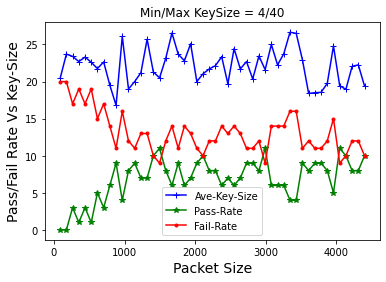

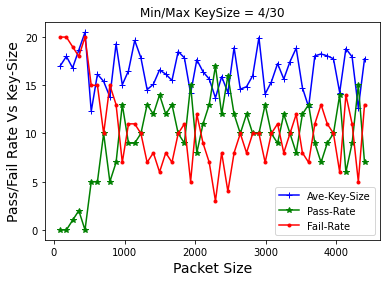

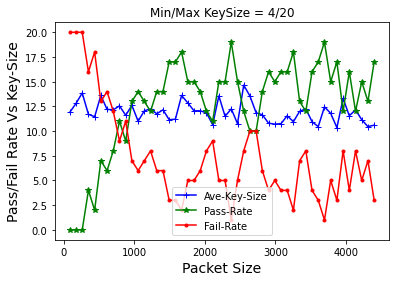

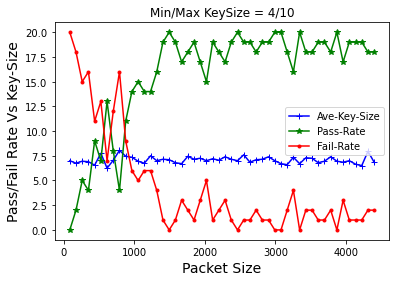

In [7]:
global Verbose
Verbose = False

if __name__ == "__main__":
    myKey = "BEAR"
#    myCiphertext = encrypt_vignere(PT_1,myKey,ALPHABET)
#    myPlaintext = decrypt_vignere(myCiphertext,myKey,ALPHABET)
#    myKeyLen = kasiskiKeyLength(myCiphertext)
#    substrings, table = generate_frequency_table(myCiphertext,myKeyLen,ALPHABET)
#    pKey = getPredictedKey(substrings,table,myKeyLen,ALPHABET)
#    myPlaintext = decrypt_vignere(myCiphertext,pKey,ALPHABET)
    myPlainText = PT_1+PT_2
    myCiphertext = encrypt_vignere(myPlainText,myKey,ALPHABET_NO_NUM_SPACE)
    if Verbose:
        print("Cipher Text Length:", len(myCiphertext))
    myDecryptText = decrypt_vignere(myCiphertext,myKey,ALPHABET_NO_NUM_SPACE)
    myKeyLen = kasiskiKeyLength(myCiphertext)
    substrings, table = generate_frequency_table(myCiphertext,myKeyLen,ALPHABET_NO_NUM_SPACE)
    pKey = getPredictedKey(substrings,table,myKeyLen,ALPHABET_NO_NUM_SPACE)
    myPlaintext = decrypt_vignere(myCiphertext,pKey,ALPHABET_NO_NUM_SPACE)
    main_test_max_keySize(40)
    main_test_max_keySize(30)
    main_test_max_keySize(20)
    main_test_max_keySize(10)
